# Praktikum 3

## Teil I

### 1.

In [2]:
from hdbcli import dbapi
import numpy as np
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt

hana_ip = '63.35.189.226'
connection = dbapi.connect(hana_ip, 39015, 'SYSTEM', 'Glorp2018!')
cursor = connection.cursor()

In [2]:
sqll = [
'select top 100 "adj", "noun", count(*) as "count" from ',
'(SELECT W1.TA_TOKEN as "adj",',
'W2.TA_TOKEN as "noun",',
'W2.TA_COUNTER - W1.TA_COUNTER as diff',
'FROM "SYSTEM"."$TA_WIKIINDEX" W1',
'INNER JOIN "SYSTEM"."$TA_WIKIINDEX" W2 ',
'ON W1.ID = W2.ID',
'AND W1.TA_COUNTER < W2.TA_COUNTER',
'AND W1.TA_TYPE = \'adjective\'',
'AND W2.TA_TYPE = \'noun\')',
'where diff = 1',
'group by "adj", "noun"',
'order by "count" desc'
]
sqls = ' '.join(sqll)
print('Fire SQL statement:')
print(sqls)
print('')
cursor.execute(sqls)
df = pd.DataFrame(cursor, columns=['adj','noun','count'])
df.head(20)

Fire SQL statement:
select top 100 "adj", "noun", count(*) as "count" from  (SELECT W1.TA_TOKEN as "adj", W2.TA_TOKEN as "noun", W2.TA_COUNTER - W1.TA_COUNTER as diff FROM "SYSTEM"."$TA_WIKIINDEX" W1 INNER JOIN "SYSTEM"."$TA_WIKIINDEX" W2  ON W1.ID = W2.ID AND W1.TA_COUNTER < W2.TA_COUNTER AND W1.TA_TYPE = 'adjective' AND W2.TA_TYPE = 'noun') where diff = 1 group by "adj", "noun" order by "count" desc



,adj,noun,count
0,United,States,1400
1,video,game,775
2,United,Kingdom,598
3,Game,Boy,403
4,19th,century,320
5,video,games,314
6,extinct,genus,240
7,same,time,233
8,royal,family,231
9,Prime,Minister,231


In [4]:
sqll = [
'select top 100 "adj", "noun", count(*) as "count" from',
'(SELECT W1.TA_TOKEN as "adj",',
'        W2.TA_TOKEN as "noun",',
'        W2.TA_COUNTER - W1.TA_COUNTER as diff',
'FROM "SYSTEM"."$TA_CDESCRIND" W1',
'INNER JOIN "SYSTEM"."$TA_CDESCRIND" W2',
'  ON W1.CMPLID = W2.CMPLID',
'  AND W1.TA_COUNTER < W2.TA_COUNTER',
'  AND W1.TA_TYPE = \'adjective\'',
'  AND W2.TA_TYPE = \'noun\')',
'where diff = 1',
'group by "adj", "noun"',
'order by "count" desc',
]
sqls = ' '.join(sqll)
print('Fire SQL statement:')
print(sqls)
print('')
cursor.execute(sqls)
df = pd.DataFrame(cursor, columns=['adj','noun','count'])
df.head(20)

Fire SQL statement:
select top 100 "adj", "noun", count(*) as "count" from (SELECT W1.TA_TOKEN as "adj",         W2.TA_TOKEN as "noun",         W2.TA_COUNTER - W1.TA_COUNTER as diff FROM "SYSTEM"."$TA_CDESCRIND" W1 INNER JOIN "SYSTEM"."$TA_CDESCRIND" W2   ON W1.CMPLID = W2.CMPLID   AND W1.TA_COUNTER < W2.TA_COUNTER   AND W1.TA_TYPE = 'adjective'   AND W2.TA_TYPE = 'noun') where diff = 1 group by "adj", "noun" order by "count" desc



,adj,noun,count
0,REAR,TIRE,4569
1,STEERING,WHEEL,3154
2,FRONT,TIRE,2902
3,APPROXIMATE,FAILURE,2412
4,SIDE,TIRE,2353
5,SAME,PROBLEM,2144
6,ORIGINAL,EQUIPMENT,2121
7,FRONT,END,1962
8,SEVERAL,TIMES,1887
9,NEW,TIRES,1861


### 4.

In [20]:
sqll = [
'select concat(lower("adj"), concat(\' \', lower("noun"))), count(*) as "count" from',
'(SELECT W1.CMPLID as "id",',
'        W1.TA_TOKEN as "adj",',
'        W2.TA_TOKEN as "noun",',
'        W2.TA_COUNTER - W1.TA_COUNTER as diff',
'FROM "SYSTEM"."$TA_CDESCRIND" W1',
'INNER JOIN "SYSTEM"."$TA_CDESCRIND" W2',
'  ON W1.CMPLID = W2.CMPLID',
'  AND W1.TA_COUNTER < W2.TA_COUNTER',
'  AND W1.TA_TYPE = \'adjective\'',
'  AND W2.TA_TYPE = \'noun\')',
'where diff = 1',
'and "id" < 1000000',
'and "noun" = \'TIRE\'',
'group by "adj", "noun"',
'order by "count" desc',
]
sqls = ' '.join(sqll)
print('Fire SQL statement:')
print(sqls)
print('')
cursor.execute(sqls)
df = pd.DataFrame(cursor, columns=['bigram','count'])
df.head(20)

Fire SQL statement:
select concat(lower("adj"), concat(' ', lower("noun"))), count(*) as "count" from (SELECT W1.CMPLID as "id",         W1.TA_TOKEN as "adj",         W2.TA_TOKEN as "noun",         W2.TA_COUNTER - W1.TA_COUNTER as diff FROM "SYSTEM"."$TA_CDESCRIND" W1 INNER JOIN "SYSTEM"."$TA_CDESCRIND" W2   ON W1.CMPLID = W2.CMPLID   AND W1.TA_COUNTER < W2.TA_COUNTER   AND W1.TA_TYPE = 'adjective'   AND W2.TA_TYPE = 'noun') where diff = 1 and "id" < 1000000 and "noun" = 'TIRE' group by "adj", "noun" order by "count" desc



,bigram,count
0,rear tire,4206
1,front tire,2591
2,side tire,1673
3,spare tire,828
4,new tire,608
5,flat tire,481
6,right tire,475
7,left tire,427
8,second tire,410
9,first tire,327


In [24]:
print(df.shape)

(577, 2)


Das bedeutet, dass wir 577 features haben.
Als nächtes bauen wir ein Wörtbuch auf.

In [29]:
from gensim import corpora
bigram_words = df['bigram'].values.flatten().tolist()
bigram_dic = corpora.Dictionary([bigram_words])

In [38]:
sqll = [
'select lower(CDESCR) from CMPL100K',
'where CMPLID < 1000000'
]
sqls = ' '.join(sqll)
print('Fire SQL statement:')
print(sqls)
print('')
cursor.execute(sqls)
df_cdescr = pd.DataFrame(cursor, columns=['cdescr'])
df_cdescr.head()

Fire SQL statement:
select lower(CDESCR) from CMPL100K where CMPLID < 1000000



,cdescr
0,wants listing of dealers who install air bag o...
1,"recalls 95e-024000 and 984-003000, evenflo on ..."
2,"evenflo models 207 and 492, dom 12/15/95; the ..."
3,"abs brakes failed in rainy weather, resulting ..."
4,wants to disarm the passenger's side air bag s...


In [59]:
import numpy as np
from scipy.sparse import dok_matrix

text_corpus = df_cdescr['cdescr'].values
bigrams = []
for document in text_corpus:
    bigs = []
    words = [word for word in document.lower().split()]
    for idx, _ in enumerate(words[:-1]):
        bigs.append(words[idx]+' '+words[idx+1])
    bigrams.append(bigs)
bow_corpus = [bigram_dic.doc2bow(bigram) for bigram in bigrams]

# now we have bow with sparse vectors but we need dense

shape = (len(bow_corpus), len(bigram_dic))
bow_mat = np.zeros(shape, dtype=int)
for idx, vec in enumerate(bow_corpus):
    for pos, v in vec:
        bow_mat[idx][pos] = v
print(bow_mat)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Das mit den Kategorien ist mir ein Rätsel.
Neuer Plan: Alle Bigramme extrahieren und als Class Label 1 für 'Tire' und 0 für 'nicht Tire' vergeben.

In [111]:
sqll = [
'select lower("adj"), lower("noun") as "tire" from',
'(SELECT W1.CMPLID as "id",',
'        W1.TA_TOKEN as "adj",',
'        W2.TA_TOKEN as "noun",',
'        W2.TA_COUNTER - W1.TA_COUNTER as diff',
'FROM "SYSTEM"."$TA_CDESCRIND" W1',
'INNER JOIN "SYSTEM"."$TA_CDESCRIND" W2',
'  ON W1.CMPLID = W2.CMPLID',
'  AND W1.TA_COUNTER < W2.TA_COUNTER',
'  AND W1.TA_TYPE = \'adjective\'',
'  AND W2.TA_TYPE = \'noun\')',
'where diff = 1',
'and "id" < 1000000',
]
sqls = ' '.join(sqll)
print('Fire SQL statement:')
print(sqls)
print('')
cursor.execute(sqls)
df = pd.DataFrame(cursor, columns=['adj','tire'])
df['tire'] = (df['tire'] == 'tire').astype(int)
df.head(20)

Fire SQL statement:
select lower("adj"), lower("noun") as "tire" from (SELECT W1.CMPLID as "id",         W1.TA_TOKEN as "adj",         W2.TA_TOKEN as "noun",         W2.TA_COUNTER - W1.TA_COUNTER as diff FROM "SYSTEM"."$TA_CDESCRIND" W1 INNER JOIN "SYSTEM"."$TA_CDESCRIND" W2   ON W1.CMPLID = W2.CMPLID   AND W1.TA_COUNTER < W2.TA_COUNTER   AND W1.TA_TYPE = 'adjective'   AND W2.TA_TYPE = 'noun') where diff = 1 and "id" < 1000000



,adj,tire
0,bent,0
1,new,0
2,multiple,0
3,multiple,0
4,steel,0
5,bent,0
6,spare,0
7,ago,0
8,bent,0
9,front,0


In [112]:
y = df['tire'].values
print(y)
X = df['adj'].values
print(X)

[0 0 0 ... 0 0 0]
['bent' 'new' 'multiple' ... 'rear' 'various' 'rear']


In [113]:
df[df['tire'] == 1]['adj'].head()

62404        original
62406       defective
62408    catastrophic
62413          failed
62418    catastrophic
Name: adj, dtype: object

In [114]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
X_dtm = vect.fit_transform(X)
X_dtm = X_dtm.toarray()

#pd.DataFrame(X_dtm, columns = vect.get_feature_names())

# binarize the output column,
# this makes computing the observed value a 
# simple dot product
y_binarized = LabelBinarizer().fit_transform(y)
print(y_binarized)
print()

# our observed count for each class (the row)
# and each feature (the column)
observed = np.dot(y_binarized.T, X_dtm)
print(observed)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]

[[0 0 0 ... 0 0 0]]


In [115]:
chi2score = chi2(X_dtm, y)
chi2score

(array([0.12045791, 0.12045791, 0.36137372, ..., 0.12045791, 0.24091581,
        0.12045791]),
 array([0.72853838, 0.72853838, 0.5477443 , ..., 0.72853838, 0.62354545,
        0.72853838]))

In [116]:
kbest = SelectKBest(score_func = chi2, k = 3)
X_dtm_kbest = kbest.fit_transform(X_dtm, y)
X_dtm_kbest

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0]], dtype=int64)

In [120]:
kbest.get_support(indices = True)

array([2651, 3049, 3172], dtype=int64)

In [118]:
df_features = pd.DataFrame(vect.get_feature_names(), columns=['adj'])
df_features.loc[[2651, 3049, 3172]]

,adj
2651,rear
3049,side
3172,spare


In [126]:
print(chi2score[0][2651])
print(chi2score[0][3049])
print(chi2score[0][3172])

10183.784126075583
4536.679217043906
6271.191995126413


### 5.

Wir bereiten die Anfragevektoren in numerischer form vor.

In [3]:
sqll = [
    'select lower(TA_TOKEN) from',
    '(select TA_TOKEN, count(*) as "count"',
    'from "SYSTEM"."$TA_WIKIINDEX"',
    'where TA_TYPE = \'noun\'',
    'group by TA_TOKEN order by count(*) desc)',
    'where "count" > 3',
]
sqls = ' '.join(sqll)
cursor.execute(sqls)
df = pd.DataFrame(cursor, columns=['noun'])
wiki_words = df.values.flatten().tolist()
sqll = [
    'select lower(TA_TOKEN) from',
    '(select TA_TOKEN, count(*) as "count"',
    'from "SYSTEM"."$TA_CDESCRIND"',
    'where TA_TYPE = \'noun\'',
    'group by TA_TOKEN order by count(*) desc)',
    'where "count" > 3',
]
sqls = ' '.join(sqll)
cursor.execute(sqls)
df = pd.DataFrame(cursor, columns=['noun'])
cmpl_words = df.values.flatten().tolist()

In [4]:
print(wiki_words[:5])
print(cmpl_words[:5])

['game', 'dog', 'dogs', 'breed', 'time']
['vehicle', 'car', 'tire', 'tires', 'contact']


Dann nutzen wir gensim, um Wortvektoren zu erstellen.

In [5]:
from gensim import corpora
wiki_dic = corpora.Dictionary([wiki_words])
cmpl_dic = corpora.Dictionary([cmpl_words])

In [6]:
print(wiki_dic)
print(cmpl_dic)
size_cmpl = len(cmpl_dic)
size_wiki = len(wiki_dic)

Dictionary(13241 unique tokens: ["'em", '0', '000', '001', '00am']...)
Dictionary(9388 unique tokens: ['%', '%2flotsearchresults%2f%3ffree%3dtrue', '%5fencoding', "'t", '0']...)


Jetzt können wir Anfragevektoren auf Basis der dics erstellen.

In [7]:
s_test = "about cats and dogs"
s_prep = s_test.lower().split()
vec_test = wiki_dic.doc2bow(s_prep)
print(vec_test)

[(516, 1), (1954, 1), (3663, 1)]


In [8]:
from scipy.sparse import dok_matrix
from numpy.linalg import norm
import numpy as np
def sim_scalar(v1, v2, dim):
    V1 = dok_matrix((dim, 1), dtype=int)
    V2 = dok_matrix((dim, 1), dtype=int)
    for pos, v in v1:
        V1[pos] = v
    for pos, v in v2:
        V2[pos] = v
    mval = np.dot(np.transpose(V1.todense()), V2.todense())
    return mval.item()

def sim_cos(v1, v2, dim):
    V1 = dok_matrix((dim, 1), dtype=int)
    V2 = dok_matrix((dim, 1), dtype=int)
    for pos, v in v1:
        V1[pos] = v
    for pos, v in v2:
        V2[pos] = v
    V1_d = V1.todense()
    V2_d = V2.todense()
    mval = np.dot(np.transpose(V1_d), V2_d)
    V1_norm = norm(V1_d)
    V2_norm = norm(V2_d)
    w1 = mval.item()
    val = w1 / (V1_norm * V2_norm)
    return val

In [9]:
s1 = 'I drive with my car every day'
s2 = 'My car broke down yesterday'
s1_prep = s1.lower().split()
s2_prep = s2.lower().split()
v1 = cmpl_dic.doc2bow(s1_prep)
v2 = cmpl_dic.doc2bow(s2_prep)
print(v1)
print(v2)
print(sim_scalar(v1, v2, size_cmpl))
print(sim_cos(v1, v2, size_cmpl))

[(2246, 1), (3113, 1), (3511, 1), (3769, 1), (4762, 1), (5865, 1), (9262, 1)]
[(2054, 1), (2246, 1), (3470, 1), (5865, 1), (9357, 1)]
2
0.33806170189140655


### 6.

Zuerst holen wir uns den Anker String, mit dem die anderen Dokumente verglichen werden sollen.

In [10]:
anchor_id = 119408
sqll = [
    'select lower(CDESCR) from CMPL100K ',
    f'where CMPLID = {anchor_id}',
]
sqls = ' '.join(sqll)
cursor.execute(sqls)
res = cursor.fetchall()
anchor_string = res[0][0]
print(anchor_string)

wants to disarm the passenger's side air bag so that 10-year old daughter can ride in the front passenger's seat.


Jetzt müssen wir durch alle weiteren Dokumente iterieren. Dazu packen wir diese in ein Pandas Dataframe.

In [11]:
sqll = [
    'select CMPLID, lower(CDESCR) from CMPL100K ',
]
sqls = ' '.join(sqll)
cursor.execute(sqls)
df = pd.DataFrame(cursor, columns=['CMPLID', 'CDESCR'])

In [12]:
df.head(5)

,CMPLID,CDESCR
0,112392,wants listing of dealers who install air bag o...
1,115865,"recalls 95e-024000 and 984-003000, evenflo on ..."
2,116005,"evenflo models 207 and 492, dom 12/15/95; the ..."
3,116041,"abs brakes failed in rainy weather, resulting ..."
4,119408,wants to disarm the passenger's side air bag s...


Wir nutzen nun für die ähnlichkeit die in gensim eingebaute `SparseMatrixSimilarity`, die das Cosinus-Maß verwendet.

In [13]:
from gensim.utils import simple_preprocess
from collections import defaultdict

text_corpus = df['CDESCR'].values

# Create a set of frequent words
stoplist = set('for a of the and to in'.split(' '))
# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in text_corpus]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 3] for text in texts]

In [14]:
bow_corpus = [cmpl_dic.doc2bow(text) for text in processed_corpus]

In [15]:
from gensim import models

tfidf = models.TfidfModel(bow_corpus)

In [16]:
words = "I like to drive my car".lower().split()
print(tfidf[cmpl_dic.doc2bow(words)])

[(2246, 0.3296688706887746), (3511, 0.6047022610111779), (4762, 0.23639220074549594), (5336, 0.6138571736169237), (5865, 0.30487982723115736)]


In [17]:
from gensim import similarities

index = similarities.SparseMatrixSimilarity(tfidf[bow_corpus], num_features=len(cmpl_dic))

In [18]:
anchor_query = anchor_string.split()
anchor_bow = cmpl_dic.doc2bow(anchor_query)
sims = index[tfidf[anchor_bow]]
print(sims)

[0.3769747  0.0362158  0.05509496 ... 0.11375703 0.         0.01163124]


Jetzt haben wir die Ähnlichkeit vom Anker zu allen Dokumenten.
Nun sortieren wir diesen Vektor. Und geben die top `n` aus:

In [40]:
n = 5
i = 0
for document_number, score in sorted(enumerate(sims), key=lambda x: x[1], reverse=True):
    print(document_number, score)
    i += 1
    if i == n:
        break

4 1.0
5 1.0
39605 0.49434203
29 0.45698875
38554 0.45698875


Die Ergebnisse sind interessant. Wir haben 2 Dokumente mit vollständiger Übereinstimmung. Eines davon muss das selbe Dokument sein, da dies natürlich noch im Corpus enthalten ist und das andere muss ein Duplikat sein. Schauen wir uns diese doch mal an...

In [20]:
print(df['CDESCR'][4])
print(df['CMPLID'][4])
print(df['CDESCR'][5])
print(df['CMPLID'][5])
print(df['CDESCR'][39605])
print(df['CMPLID'][39605])
print(df['CDESCR'][29])
print(df['CMPLID'][29])
print(df['CDESCR'][38554])
print(df['CMPLID'][38554])

wants to disarm the passenger's side air bag so that 10-year old daughter can ride in the front passenger's seat.
119408
wants to disarm the passenger's side air bag so that 10-year old daughter can ride in the front passenger's seat.
119409
consumer wants air bag deactivated due to her short stature and the risk of injury.
88979
accidental air bag deployment.
119746
other: air bag failure. (attorney for client) *dsh
44792


Das Ergebnis ist gut.


### 7.

In [9]:
# 10 ist der cat day
anchor_id = 10
sqll = [
    'select lower(TEXT) from WIKI',
    f'where ID = {anchor_id}',
]
sqls = ' '.join(sqll)
cursor.execute(sqls)
res = cursor.fetchall()
anchor_string = res[0][0]
print(anchor_string)

international cat day is a celebration which takes place on 8 august, every year. it was created in 2002 by the international fund for animal welfare. international cat day is also referred to as world cat day in some countries and since its inception, it has been growing worldwide. and the u.s. celebrate both international cat day and their own national cat day on october 29th. international cat day is a day to raise awareness for cats and learn about ways to help and protect them. cat day is another unofficial cat holiday observed on february 22, that originated in japan and has become a social media sensation and is growing worldwide as people across the globe share their cat pictures and videos.


In [10]:
sqll = [
    'select ID, lower(TEXT) from WIKI ',
]
sqls = ' '.join(sqll)
cursor.execute(sqls)
df = pd.DataFrame(cursor, columns=['ID', 'TEXT'])

In [11]:
df.head(5)

,ID,TEXT
0,2681,barcarenichthyes is an extinct genus of prehis...
1,2682,austrolepidotus is an extinct genus of prehist...
2,2683,aulolepis is an extinct genus of prehistoric b...
3,2684,archaeomaene tenuis is an extinct species of l...
4,2685,amiopsis is an extinct genus of prehistoric bo...


In [12]:
from gensim.utils import simple_preprocess
from collections import defaultdict

text_corpus = df['TEXT'].values

# Create a set of frequent words
stoplist = set('for a of the and to in'.split(' '))
# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in text_corpus]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 3] for text in texts]

In [13]:
bow_corpus = [wiki_dic.doc2bow(text) for text in processed_corpus]

In [26]:
from gensim import models

tfidf = models.TfidfModel(bow_corpus)

In [15]:
# transform the "system minors" string
words = "My cat is a grumpy kitten".lower().split()
print(tfidf[cmpl_dic.doc2bow(words)])

[(1216, 0.6441788725831233), (2309, 0.5903316479509355), (5865, 0.48635596587794494)]


In [16]:
from gensim import similarities

index = similarities.SparseMatrixSimilarity(tfidf[bow_corpus], num_features=len(wiki_dic))

In [17]:
anchor_query = anchor_string.split()
anchor_bow = wiki_dic.doc2bow(anchor_query)
sims = index[tfidf[anchor_bow]]
print(sims)

[0.         0.         0.         ... 0.03734214 0.03487265 0.01928222]


In [1]:
n = 5
i = 0
for document_number, score in sorted(enumerate(sims), key=lambda x: x[1], reverse=True):
    print(document_number, score)
    i += 1
    if i == n:
        break

In [19]:
def print_info(idx):
    print(f"ID: {df['ID'][idx]}")
    print(df['TEXT'][idx])

In [22]:
print_info(1204)
print_info(1364)
print_info(1597)
print_info(1407)

ID: 10
international cat day is a celebration which takes place on 8 august, every year. it was created in 2002 by the international fund for animal welfare. international cat day is also referred to as world cat day in some countries and since its inception, it has been growing worldwide. and the u.s. celebrate both international cat day and their own national cat day on october 29th. international cat day is a day to raise awareness for cats and learn about ways to help and protect them. cat day is another unofficial cat holiday observed on february 22, that originated in japan and has become a social media sensation and is growing worldwide as people across the globe share their cat pictures and videos.
ID: 554
national cat day is an awareness day to raise awareness of homeless cats. it takes place on august 8 in canada, or october 29 in the united states. international cat day, august 8, was created in 2002 by the international fund for animal welfare.
ID: 210
the cheshire cat (/ˈt

## Teil II

### 1.

Anfragevektoren:

In [155]:
q1 = {'AIR': 1, 'BAG': 1}
q2 = {'AIR': 1, 'BAG': 1, 'ACCIDENT':1}
q3 = {'AIR': 1, 'BAG': 1, 'FIRE': 1}
q4 = {'AIR': 2, 'BAG': 2, 'DEPLOYMENT':2, 'ACCIDENT':2}
q5 = {'BULL': 2, 'SHIT': 2}

Generate bag of words

In [156]:
def query_to_bow(q, tfidf, dic):
    words = []
    for key in q:
        for _ in range(q[key]):
            words.append(str(key).lower())
    bow = tfidf[dic.doc2bow(words)]
    return bow

In [158]:
bow1 = query_to_bow(q1, tfidf, cmpl_dic)
bow2 = query_to_bow(q2, tfidf, cmpl_dic)
bow3 = query_to_bow(q3, tfidf, cmpl_dic)
bow4 = query_to_bow(q4, tfidf, cmpl_dic)
bow5 = query_to_bow(q5, tfidf, cmpl_dic)

In [27]:
sims = index[tfidf[anchor_bow]]
n = 5
i = 0
for document_number, score in sorted(enumerate(sims), key=lambda x: x[1], reverse=True):
    print(document_number, score)
    i += 1
    if i == n:
        break

[(1379, 0.41180570402967587),
 (1726, 0.6283384969694659),
 (2055, 0.6432658087920369),
 (5030, 0.1477020466814936)]

In [41]:
sqll = [
    'select CMPLID, lower(COMPDESC) from CMPL100K ',
]
sqls = ' '.join(sqll)
cursor.execute(sqls)
df_pr = pd.DataFrame(cursor, columns=['id', 'compdesc'])

In [150]:
import matplotlib.pyplot as plt
import scikitplot as skplt


def prc(bow):
    sims = index[bow]
    df_pr['y'] = df_pr['compdesc'].str.contains('air bags').astype(int)
    df_pr['pred'] = sims

    y = df_pr['y'].values
    pred = df_pr['pred'].values
    pmat = np.column_stack((1-pred,pred))
    skplt.metrics.plot_precision_recall(y, pmat)

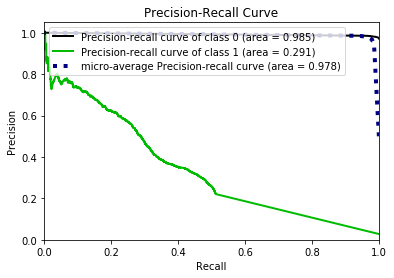

In [151]:
prc(bow1)

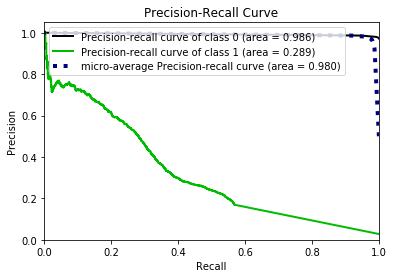

In [152]:
prc(bow2)

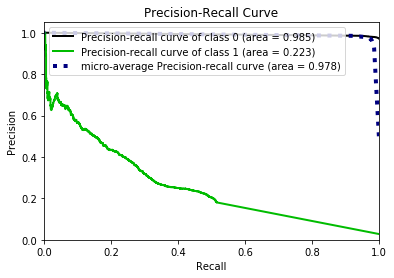

In [153]:
prc(bow3)

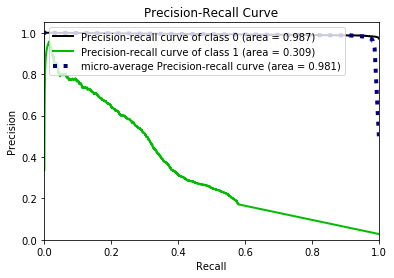

In [154]:
prc(bow4)

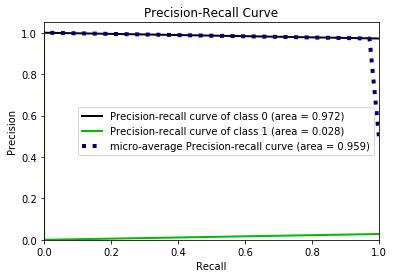

In [160]:
prc(bow5)

Nicht hübsche Alternative

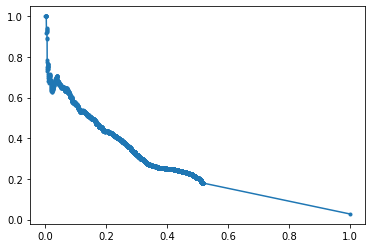

In [162]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
sims = index[bow3]
df_pr['y'] = df_pr['compdesc'].str.contains('air bags').astype(int)
df_pr['pred'] = sims

y = df_pr['y'].values
pred = df_pr['pred'].values


lr_precision, lr_recall, _ = precision_recall_curve(y, pred)

pyplot.plot(lr_recall, lr_precision, marker='.', label='Cosine')